# EDA, Feature Engineering and Modelling for Rotor Temperatures


In this project, I will demonstrate various techniques including data visualization, data exploration, machine learning and machine learning optimizations.

A description of all the attributes found in the dataset is as follows:

|Attribute  |Type       |Sub-type  |Comments                                                                              |
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|ambient     |Numerical  |Continuous   |Ambient temperature by a thermal sensor near the stator.|
|coolant      |Numerical  |Continuous| The temperature of colant measured at the outflow.  |
|u_d   |Numerical  |Continuous  |d axis component of the stator voltage. |
|u_q  |Numerical  |Continuous  |q axis component of the stator voltage. |
|motor_speed|Numerical  |Continuous|The speed of a motor.    |
|torque   |Numerical  |Continuous|Torque induced by current.             |
|i_d |Numerical |Continuous   |d axis component of the stator current.          |
|i_q  |Numerical|Continuous   |q axis component of the stator current.     |
|pm      |Numerical|Continuous   |Permanent Magnent surface temperature representing the rotor temperature, measured by an infrared.|
|profile_id   |Catogorical|Nominal |each measurement session has a unique ID


## Table of Content

1. [Explorary Data Analysis](#1)
    - 1.1 [Univariate Analysis](#1.1)
    - 1.2 [Multivariate Analysis](#1.2)
2. [Feature Engineering](#2)
3. [Model Development](#3)
4. [Results and Discussion](#4)

In [7]:
#Load libraries
library(psych)
library(ggplot2)
library(reshape2)
library(EnvStats)
library(tidyverse)
library(GGally)
library(dplyr)
library(MASS)
library(leaps)
library(lattice)
library(glmnet)
library(stats)
library(fastDummies)
library(car)
library(caret)
library(randomForest)

## 1. Exploratory Data Analysis <a class="anchor" id="1"></a>

In this section of the project, I will explore the dataset, to better understand the attributes and the domain knowledge behind these attributes. This section will have 2 main sub-sections: **Univariate Analysis** and **Multivariate Analysis**

In [15]:
df<-read.csv('pmsm_data.csv',header=TRUE)

#Take a look at the first and last few rows of df
head(df)
tail(df)

ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,profile_id
0.1176819,-1.040829,-1.0267303,0.9250645,1.2124813,0.3586899,-0.8343090,0.3229330,-0.08831267,4
-0.5547717,-1.087189,-1.2258921,0.5125759,2.0241232,0.2841797,-1.3638294,0.2340145,0.71040170,4
-0.7722329,-1.063652,0.2988575,0.9562448,-0.1402458,-0.2591392,1.0291220,-0.2457111,-1.59260400,4
0.2199584,-1.083475,-1.0261079,0.9278145,1.2124836,0.3574240,-0.8381095,0.3228101,-0.14167030,4
0.4015749,-1.078981,0.3155328,-0.7094008,-0.9518901,-0.2562895,1.0291730,-0.2457109,-1.96488810,4
-0.7697667,-1.089577,0.2999456,0.9589649,-0.1402460,-0.2592790,1.0291333,-0.2457186,-1.77564350,4


,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,profile_id
15142,-0.6974700,1.49688820,0.3176318,-1.324828,-1.22242870,-0.2556397,1.0291415,-0.2457166,-0.835639600,81
15143,-0.1489317,1.74755540,0.2998942,-1.294876,-1.22242950,-0.2556397,1.0291376,-0.2457070,-0.993255400,81
15144,-0.5091294,1.46453430,-0.7905264,1.208344,0.80467504,0.3245067,-0.2590534,0.3256622,-0.004079474,81
15145,-0.1557110,-0.04516133,0.3011341,-1.294293,-1.22243130,-0.2556397,1.0291479,-0.2457459,-0.771475800,81
15146,-0.1561356,-0.04458057,0.3000615,-1.293905,-1.22242890,-0.2556397,1.0291611,-0.2456962,-0.663378950,81
15147,-0.7672885,-0.30993983,0.3228580,1.125235,-0.03886923,-0.2813110,1.0211550,-0.2752085,-1.903265100,81


In [13]:
#check for dimensions of df
dim(df)

[1] 15147    10

There are `15147` rows and `10` columns in this dataset. Next, we look at some overall non-graphical characteristics of the dataset as well as the attributes.

In [14]:
#Look at the structure of df
str(df)

'data.frame':	15147 obs. of  10 variables:
 $ ambient    : num  0.118 -0.555 -0.772 0.22 0.402 ...
 $ coolant    : num  -1.04 -1.09 -1.06 -1.08 -1.08 ...
 $ u_d        : num  -1.027 -1.226 0.299 -1.026 0.316 ...
 $ u_q        : num  0.925 0.513 0.956 0.928 -0.709 ...
 $ motor_speed: num  1.212 2.024 -0.14 1.212 -0.952 ...
 $ torque     : num  0.359 0.284 -0.259 0.357 -0.256 ...
 $ i_d        : num  -0.834 -1.364 1.029 -0.838 1.029 ...
 $ i_q        : num  0.323 0.234 -0.246 0.323 -0.246 ...
 $ pm         : num  -0.0883 0.7104 -1.5926 -0.1417 -1.9649 ...
 $ profile_id : int  4 4 4 4 4 4 4 4 4 4 ...


Beside `profile_id` being of integer type, all the other attributes are of continuous numerical type.


### Univariate Analysis <a class="anchor" id="1.1"></a>

Next, we can take a look at the spread of `profile_id`, and examine the composition of the dataset

Total number of profiles:  52 
Distribution of records for each profile:

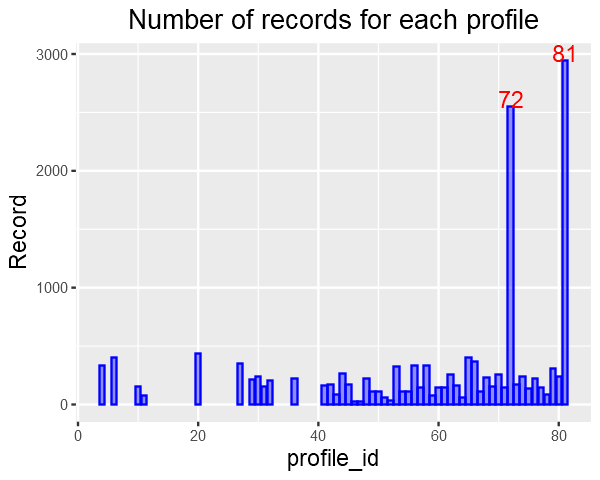

In [25]:
cat('Total number of profiles: ',length(unique(df$profile_id)),'\n')

cat('Distribution of records for each profile:')

options(repr.plot.width=5, repr.plot.height=4)

profile_n<-df %>% group_by(profile_id) %>% count() 
profile_n$label<-' '
mutatedlabel=profile_n[profile_n$profile_id==72|profile_n$profile_id==81,]%>% mutate(label=profile_id)
profile_n[profile_n$profile_id==72|profile_n$profile_id==81,]$label=as.character(mutatedlabel$label)


profile_n %>% ggplot(aes(x=profile_id, y=n))+geom_bar(stat='identity',colour='blue',fill='blue',alpha=0.4)+ 
geom_text(
    aes(label = label),
    colour = "red", size = 5,
    vjust = 0.1, position = position_dodge(0.8))+ggtitle('Number of records for each profile')+ylab('Record')+
theme(plot.title = element_text(size=16,hjust=0.5),
      axis.title.y = element_text(size = rel(1.2), angle = 90),
      axis.title.x = element_text(size = rel(1.2)),
      legend.position='none' )

We can see there are a range of records measured in various `profile_id`, the peaks are 72 and 81 which are going to be our testing dataset.  

Next, we inspect whether different profile has different distribution of `pm`

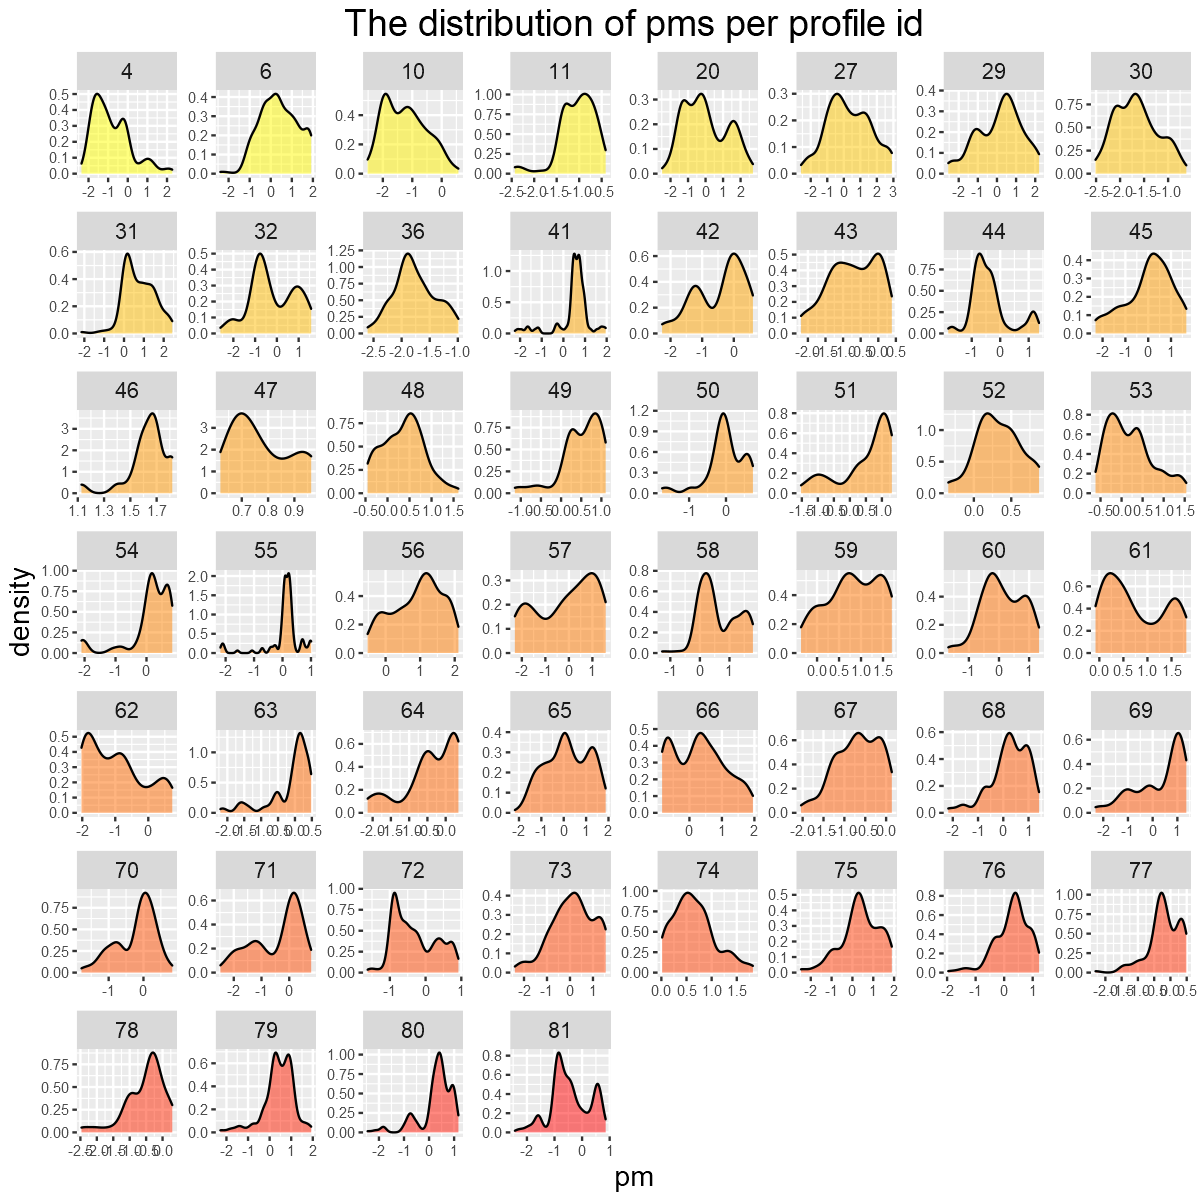

In [32]:
options(repr.plot.width=10, repr.plot.height=10)

#Plot a density plot for pms grouped by profile ids
ggplot(df, aes(x=pm,fill=profile_id)) + geom_density(aes(fill=profile_id),alpha=0.5)+
 facet_wrap(~profile_id, scales="free")+ggtitle("The distribution of pms per profile id")+
theme( strip.text.x = element_text(size = 13),plot.title = element_text(size=22,hjust=0.5),
      axis.title.y = element_text(size = rel(1.5), angle = 90),
      axis.title.x = element_text(size = rel(1.5)),
      legend.position='none' )+ scale_fill_gradient(low = "yellow", high = "red")

We can see that different sessions have different distribution of pms. We need to be mindful about it,  when we train the model we should use data from a variety of sessions, so that the model is not biased towards any particular session. Regardless, our model should be able to make predictions regardless of which sessions the measurement come from. Therefore, we drop `profile_id` column.

Next I will look at the Descriptive statistics of the 9 attributes(8 used for prediction and 1 used as the target variable). From here onwards, I will only examine the training data, as the testing data is used for testing the models. 


In [74]:
#Get training data
train=subset(df,!(profile_id %in% c(72,81)))

#Get testing data
test=subset(df, profile_id %in% c(72,81))

In [75]:
#Descriptive Summary of training data
summary(train[-10])

#Some additional descriptive statistics 
round(describe(train[-10]),3)

    ambient             coolant               u_d           
 Min.   :-3.327762   Min.   :-1.237039   Min.   :-1.653711  
 1st Qu.:-0.601962   1st Qu.:-1.040703   1st Qu.:-0.850785  
 Median : 0.294721   Median :-0.185142   Median : 0.245695  
 Mean   : 0.004568   Mean   :-0.009028   Mean   :-0.009845  
 3rd Qu.: 0.687956   3rd Qu.: 0.609588   3rd Qu.: 0.358766  
 Max.   : 2.710575   Max.   : 2.278400   Max.   : 2.273458  
      u_q             motor_speed           torque              i_d          
 Min.   :-1.814612   Min.   :-1.22244   Min.   :-3.31634   Min.   :-3.17644  
 1st Qu.:-0.887766   1st Qu.:-0.95187   1st Qu.:-0.27352   1st Qu.:-0.76252  
 Median :-0.092686   Median :-0.14024   Median :-0.13641   Median : 0.15256  
 Mean   : 0.008343   Mean   : 0.01206   Mean   : 0.01013   Mean   :-0.01624  
 3rd Qu.: 0.863689   3rd Qu.: 0.86094   3rd Qu.: 0.56115   3rd Qu.: 1.01184  
 Max.   : 1.770184   Max.   : 2.02413   Max.   : 3.01379   Max.   : 1.06017  
      i_q                  

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ambient,1,9652,0.005,1.013,0.295,0.094,0.608,-3.328,2.711,6.038,-0.873,0.746,0.01
coolant,2,9652,-0.009,1.002,-0.185,-0.120,1.266,-1.237,2.278,3.515,0.651,-0.716,0.01
u_d,3,9652,-0.010,1.003,0.246,-0.053,1.019,-1.654,2.273,3.927,0.220,-0.527,0.01
u_q,4,9652,0.008,0.996,-0.093,-0.030,1.308,-1.815,1.770,3.585,0.191,-1.263,0.01
motor_speed,5,9652,0.012,0.999,-0.140,-0.047,1.301,-1.222,2.024,3.247,0.318,-1.173,0.01
torque,6,9652,0.010,1.009,-0.136,0.022,0.753,-3.316,3.014,6.330,-0.049,0.719,0.01
i_d,7,9652,-0.016,1.002,0.153,0.095,1.277,-3.176,1.060,4.237,-0.601,-0.763,0.01
i_q,8,9652,0.009,1.009,-0.117,0.022,0.758,-3.309,2.914,6.223,-0.086,0.716,0.01
pm,9,9652,0.011,1.013,0.115,0.042,0.995,-2.605,2.905,5.510,-0.252,-0.369,0.01


Based on the descriptive statistics, apart from `profile_id`, all attributes are at a range of between -3.5 to 3.5, and the median for each attribute is roughly around 0. There are also no missing data, as all columns have exactly 9652 observations. 

However, upon closer examination of domain knowledge, it is impossible that the actual values for all these attributes are within this range. For instance, we can not have the actual motor speed, or current measurements as negative, or the rotor temperature or ambient temperature to be always within the range of -3.5 to 3.5. **Therefore the data must have undergone some kind of standardisation/scalling process.**

Therefore, I will not do any standardisation for the dataset. 

In addition, by looking at `sd` column in the Descriptive Statistics, we can tell that the standard deviations of the predictors are in good ranges, as they are not too small. Small standard deviation of predictors might result in the models not being able to extract much information for predictions.


Next, I will look at the distributions of each variable.

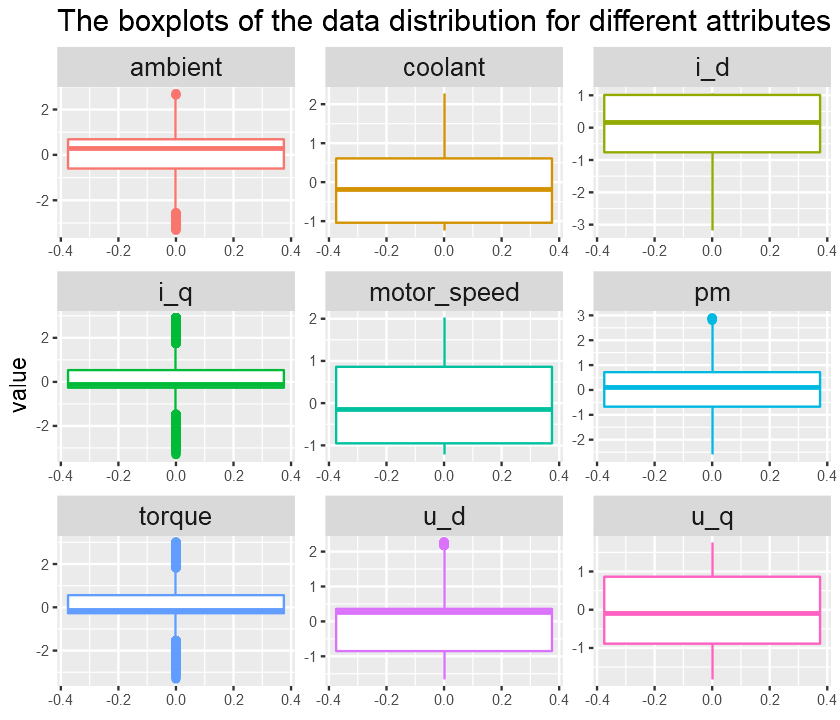

In [76]:
#Reshape the dataframe for easier plotting purpose
df_long<-pivot_longer(train,names(train[-10]))

#Plot the boxplots
options(repr.plot.width=7, repr.plot.height=6)

ggplot(df_long,aes(y=value,colour=name))+geom_boxplot()+
    facet_wrap(~name, scales="free")+ggtitle("The boxplots of the data distribution for different attributes")+
    theme( strip.text.x = element_text(size = 15),plot.title = element_text(size=18,hjust=0.5),
      axis.title.y = element_text(size = rel(1.2), angle = 90),legend.position='none' )

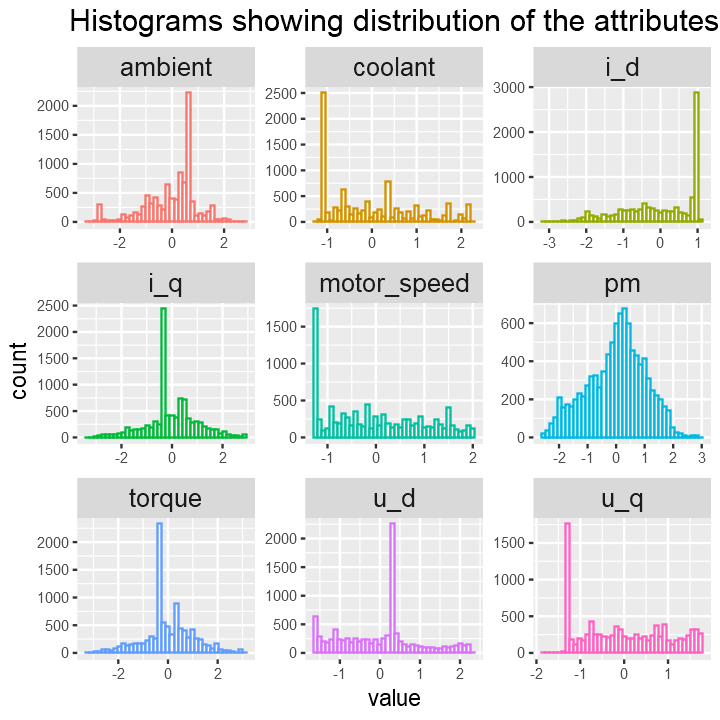

In [52]:
#Plot the histogram
options(repr.plot.width=6, repr.plot.height=6)

ggplot(df_long, aes(x=value,colour=name)) + 
  geom_histogram(fill='white',bins=40)+facet_wrap(~name, scales="free")+
  ggtitle("Histograms showing distribution of the attributes")+
  theme( strip.text.x = element_text(size = 15),plot.title = element_text(size=18,hjust=0.5),
      axis.title.y = element_text(size = rel(1.2), angle = 90),
      axis.title.x = element_text(size = rel(1.2)),
      legend.position='none' )

No id variables; using all as measure variables
Warning message:
"position_dodge requires non-overlapping x intervals"

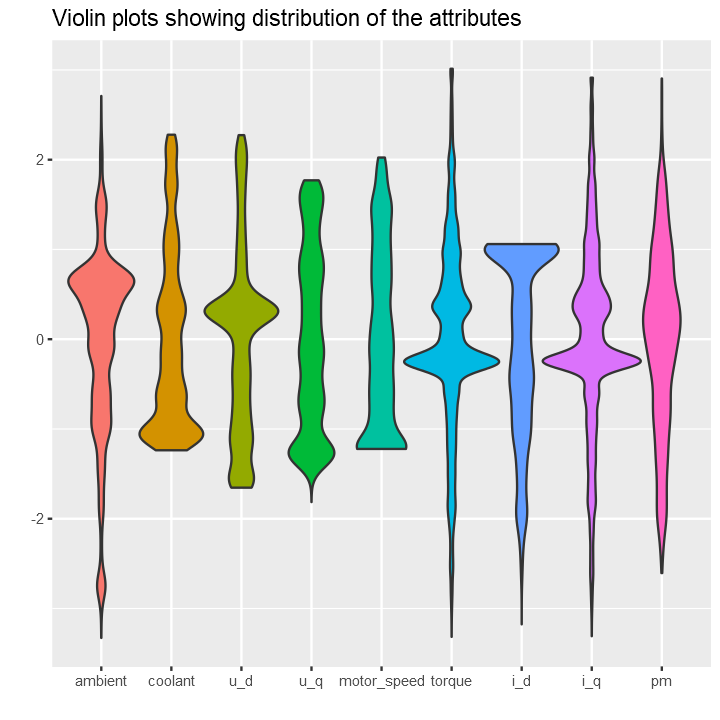

In [54]:
#Plot violin plot to see a condensed distribution of each variable
train_plot<-melt(as.data.frame(train[-10]))
train_plot %>% ggplot(aes(x=variable,y=value,fill=variable))+
    geom_violin(width=1.4)+
    theme(legend.position='none')+
    ggtitle('Violin plots showing distribution of the attributes')+xlab('')+ylab('')

First thing that we can immediately notice is that out of all the attributes, the distribution of `pm` is the closest to a normal distribution.

Based on the boxplot and the histogram, the target variable `pm` and `ambient` share relatively similar distributions.

In addition, we can see that `i_q` and `torque` share very similar data distribution, as shown in both the boxplot and the histogram and especially violin plot, in which they have almost identical shapes. This suggests that the two variables might be corellated. 

On the other hand, `motor_speed`, `u_q` and `coolant` also seem to have similar data distribution, where they all peak in the lower end, and the rest of the data have a relatively uniform distribution and have relatively low counts. This is in stark contrast to `i_d`, where the peak is in the upper end, and the rest of the data has low counts with an uniform distribution. 


Therefore, in the next section where I conduct more multivariate analysis, I will inspect more closely the interection among these variables: 

-  `pm` and `ambient`  

- `i_q`and `torque`

- `motor_speed`, `u_q` and `coolant` 

### Multivariate Analysis <a class="anchor" id="1.2"></a>

Since all the variables are continuous numerical, we examine the scatterplot matrix and correlation plot between the variables.

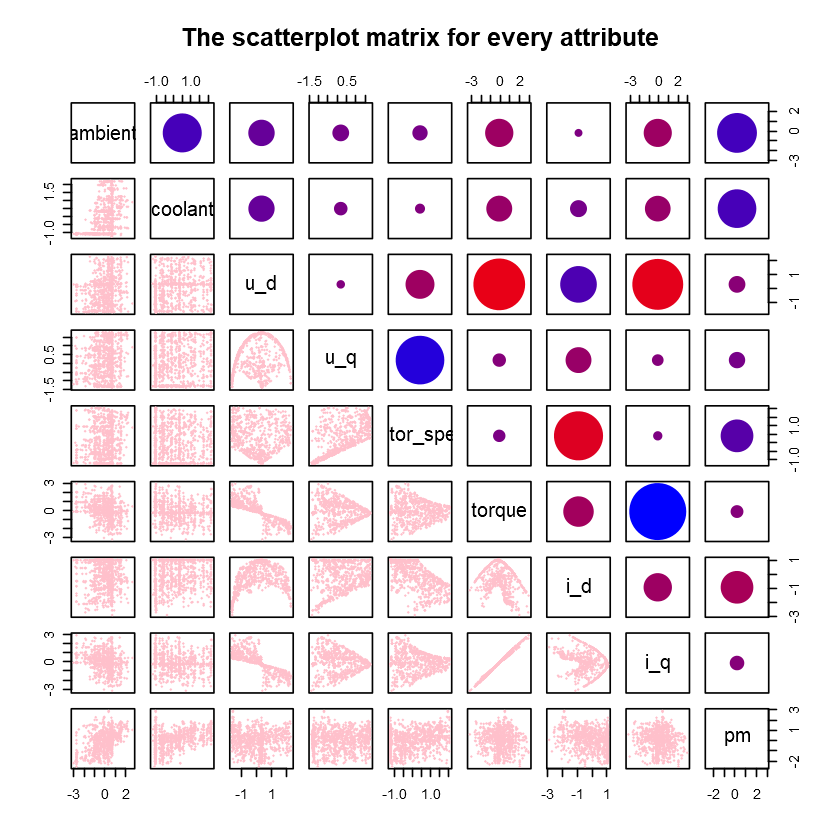

In [77]:
#the function takes an argument between 0 and 1 and return a colour gradient
colorR <- c("red","blue")
Colorgradient <- colorRamp(colorR)


#the function calculates the correlation and will return a circle based on the correlation
# if the corelation is close to 1 or -1, the circle will have a larger radius
# if the colour of the circle is closer to 1, then the circle is blue,
# if the colour of the circle is closer to -1, then the circle is red.
panel.cor <- function(w, z, ...) {
    #calculate the correlation
    corr <- cor(w, z,use = "complete.obs")
    # it returns the colour based on the input from [-1,1]
    colour <- rgb(Colorgradient((1 + corr) / 2 ) / 255 )
    
    #calculate the radius of the corcle
    radius <- sqrt(abs(corr))
    radians <- seq(0, 2*pi, len = 50)
    horizontal <- radius * cos(radians)
    vertical <- radius * sin(radians)
    #create full looks
    horizontal <- c(horizontal, tail(horizontal,n=1))
    vertical <- c(vertical, tail(vertical,n=1))

   
    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(horizontal, vertical, border=colour, col=colour)
}

#plotting the scattorplot matrx
options(repr.plot.width=7, repr.plot.height=7)   

#sample 1000 points to plot the graph to avoid crowd
pairs(train[-10][sample.int(nrow(train),1000),],pch = 18,cex=0.5,cex.labels=1.5,col="pink",upper.panel=panel.cor
      ,main="The scatterplot matrix for every attribute")

I will also plot correlation plot which directly show the correlations between each variable

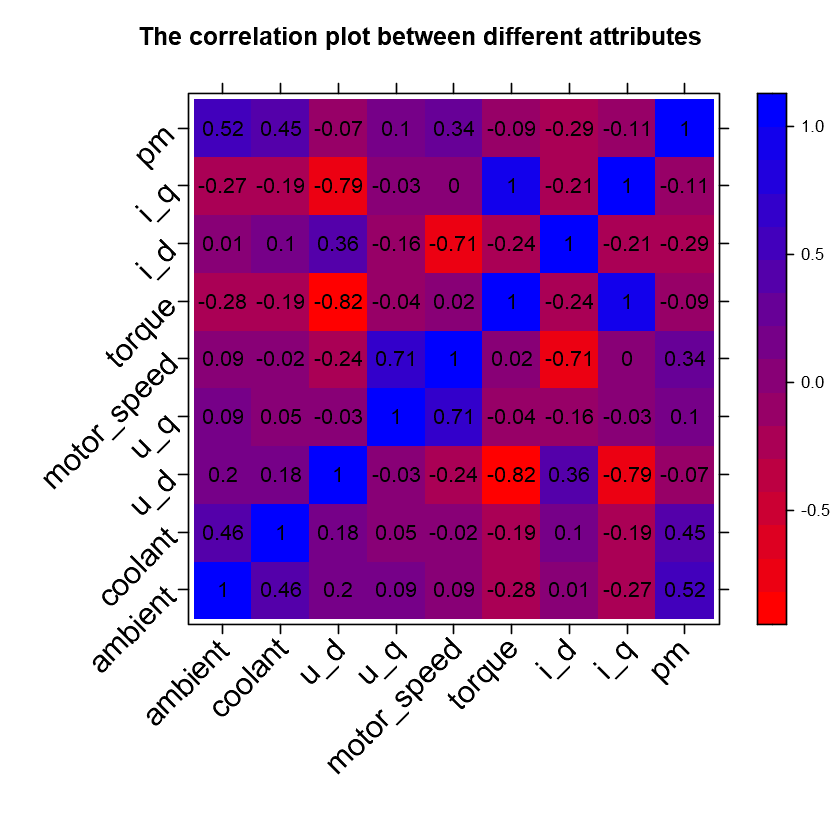

In [60]:
options(repr.plot.width=7, repr.plot.height=7)

# function  of the text of the correlation plot
paneltext <-function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x,y,round(z, 2))
}
#Define the color scheme
cols = colorRampPalette(c("red","blue"))
#Plot the correlation matrix.
levelplot(cor(train[-10]), col.regions = cols(100), main = "The correlation plot between different attributes", 
          xlab = NULL, ylab = NULL, 
scales = list(x = list(rot = 45,cex=1.5),y = list(rot = 45,cex=1.5)),panel = paneltext)

Correlation plot and the scatterplot matrix above reveal several insights, regarding multivariate interaction:

- `torque` and `i_q` has a correlation of one, which means that the values of `torque` provides a direct indication of the value of y. This is consistent with the finding in **Univariate analysis** where we find out that `torque` and `i_q` have very similar data distribution.

- Two pairs of variables: `torque` and `u_d`, `i_q` and `u_d` are highly negatively correlated, with the correlation coefficients of -0.82 and -0.79 respectively. 

- `motor_speed` and `i_d` are also moderately negatively correlated, with the correlation coefficients of -0.71. `motor_speed` and `u_q` are also moderately positively correlated, with the correlation coefficients of 0.71

- Most of the predictor varibles are correlated with each other by certain degrees except for `u_q` and `i_q`.

- Although the correlation between `u_q`,`i_q`, `u_d`,`i_d` are relatively low, but there seems to be some certain patterns between them(v, or u shapes) based on the paired scatterplots, this makes sense when combine with the domain knowledge as these attributes indicate the currents and voltages measured at q and d axis, and hence there should be some relationships between these values.

- `pm` seems to have some moderate positive linear correlation with `coolant` and  `ambient`, a weak positive linear correlation with `motor_speed` and a weak negative linear correlation with `i_d`


Therefore, we can see that most predictors interact with each other to some certain extents. 

Although I plotted each predictor vs the target variable in the paired scattorplot, it is hard to see the exact relationship based on the small plot. Next, I will plot the data again on a larger scale to have a better understanding of the relationship between each predictor and the target variable.

`geom_smooth()` using formula 'y ~ x'


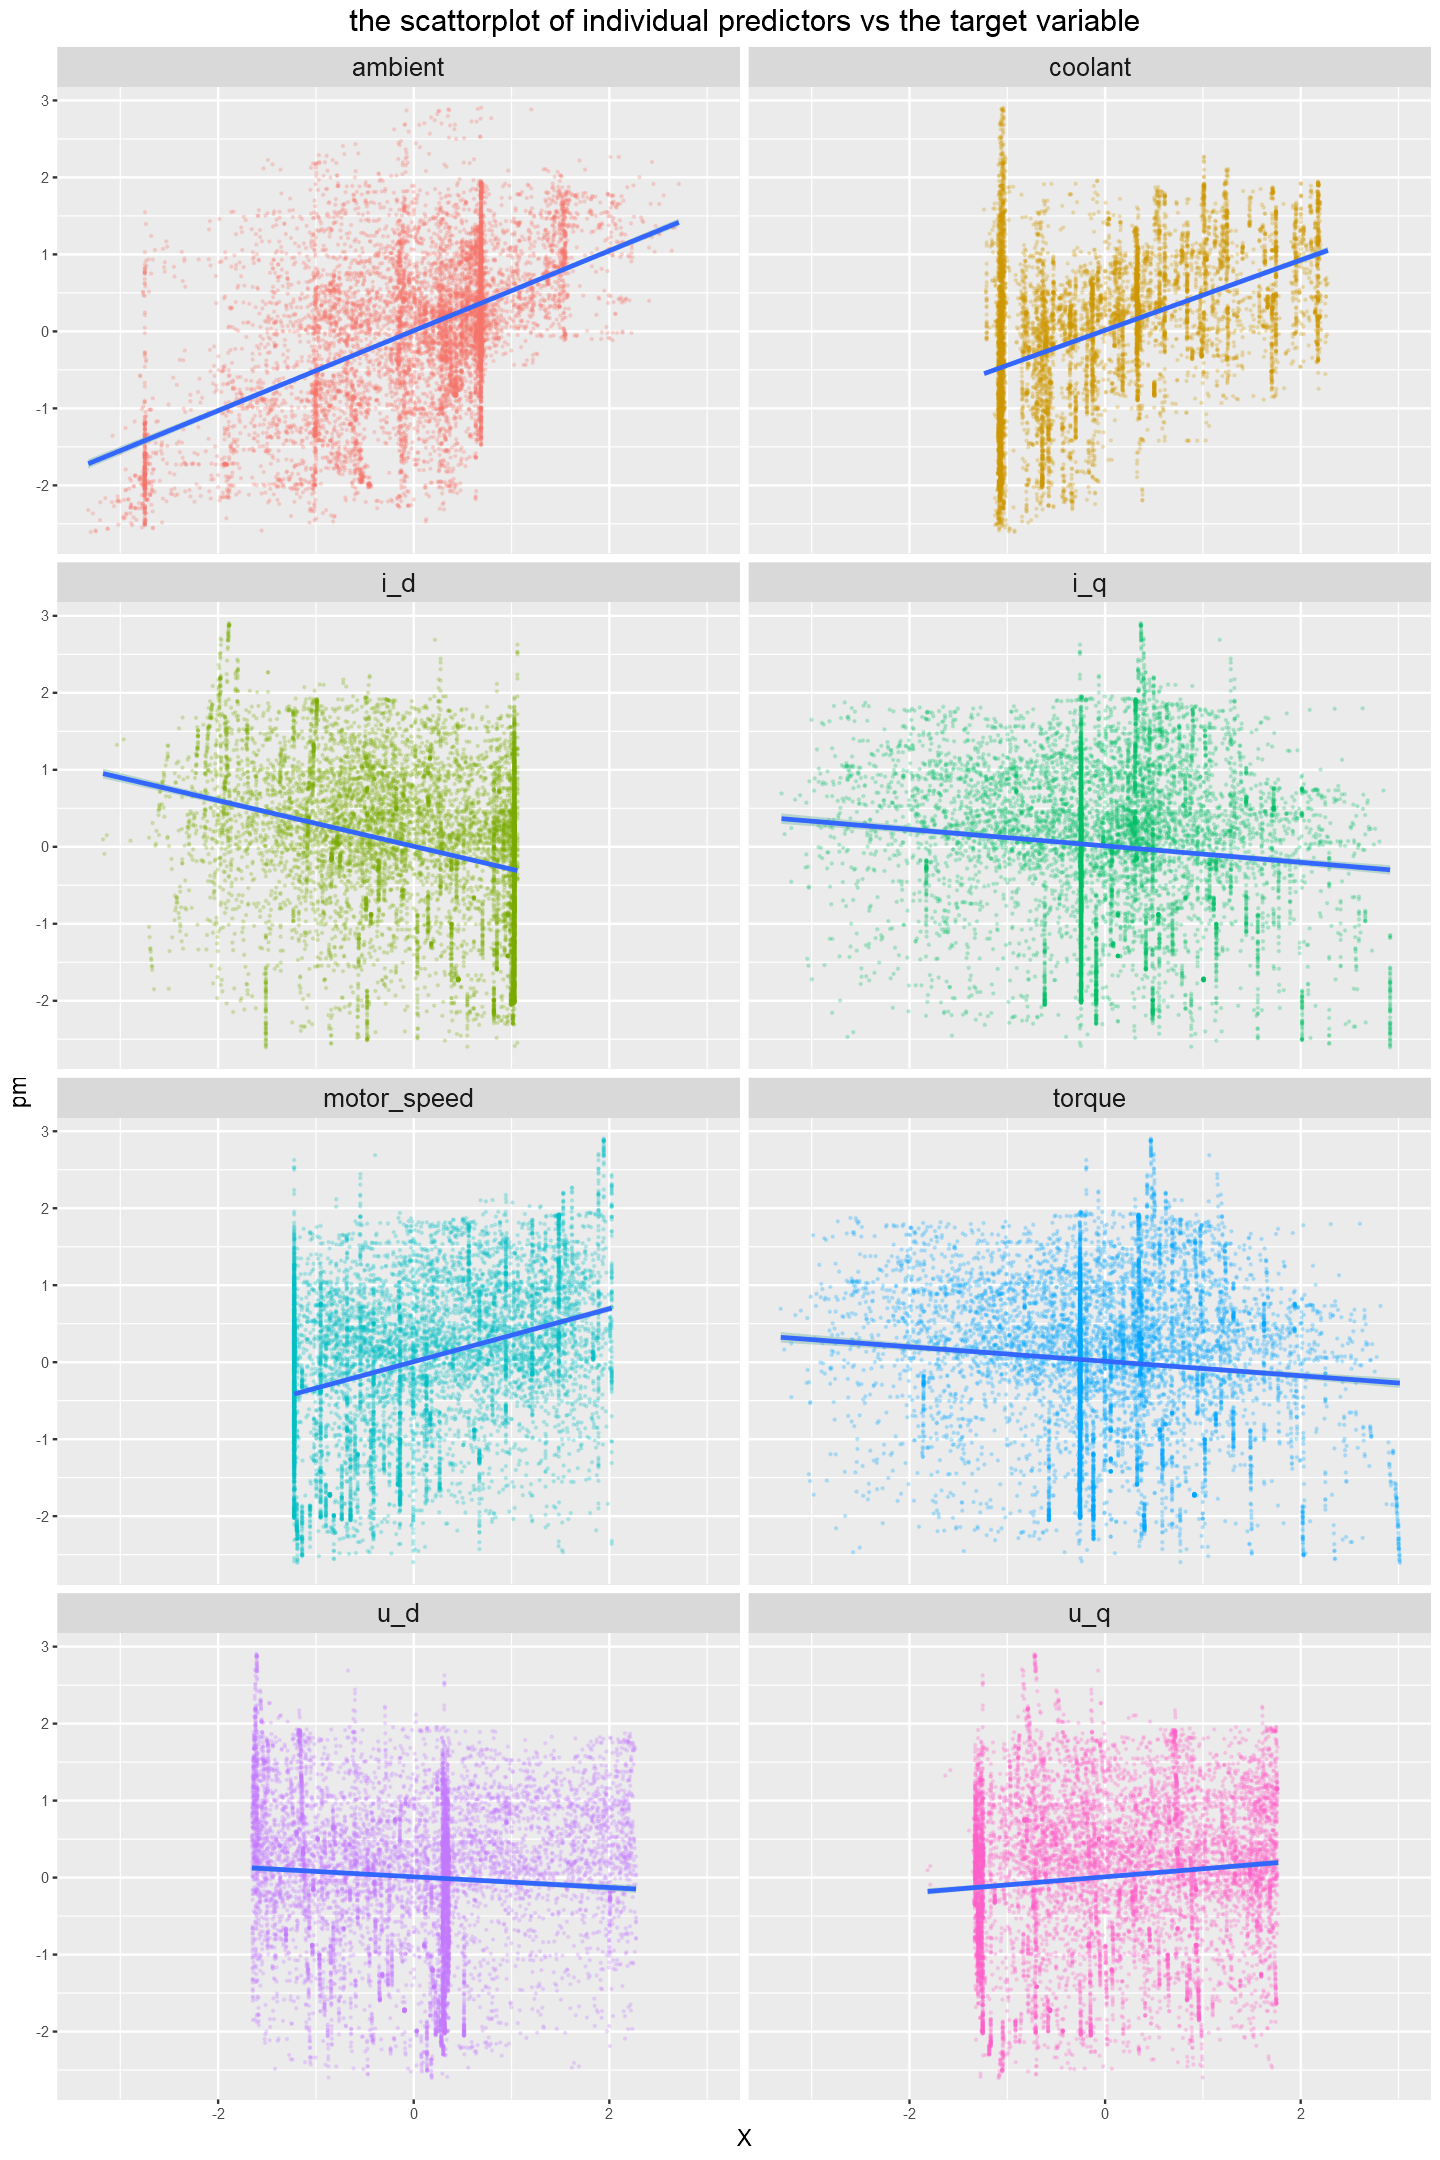

In [61]:
#create a new dataframe with three columns, values(X), the attribute group,pm
pvst<-pivot_longer(train[-10],cols=names(train[-10])[-9],names_to='group',values_to='X')

options(repr.plot.width=12, repr.plot.height=18)
ggplot(pvst, aes(x=X,y=pm)) + geom_point(aes(colour = factor(group)),size=0.2,alpha=0.2)+
facet_wrap(~ group,ncol=2)+geom_smooth(method='lm',se=TRUE,fill="#69b3a2")+
theme(strip.text.x = element_text(size = 18),legend.position="none")+
ggtitle('the scattorplot of individual predictors vs the target variable')+
theme( strip.text.x = element_text(size = 15),plot.title = element_text(size=18,hjust=0.5),
      axis.title.y = element_text(size = rel(1.2), angle = 90),
      axis.title.x = element_text(size = rel(1.2)),
      legend.position='none' )

According to the plot above, some potentially strong predictors are `ambient`, `coolant`, `i_d` and `motor_speed`, which are consitent with the results from the correlation plots. The possible reasons for the relationships between these variables are :
1. The higher the ambient and coolant temperatures(`ambient`,`coolant`) are, the higher chance of having a higher rotor temperature(`pm`). 
2. The higher the motor speed (`motor_speed`) is, the higher chance of having a higher rotor temperature(`pm`) 
3. The higher d component stator current(`i_d`) is,the higher chance of having a lower rotor temperature(`pm`).


#### Relationship between `coolant` and `pm`

Based on the scattorplot of `pm` vs `coolant` above, we can see there are a lot of points clustered on the left hand side of the plot, and these points seem to have a very different `pm` distribution from the rest of the points. Further examination might give us a better idea about the pm's distribution difference between the points have low coolant from the rest of the population. 

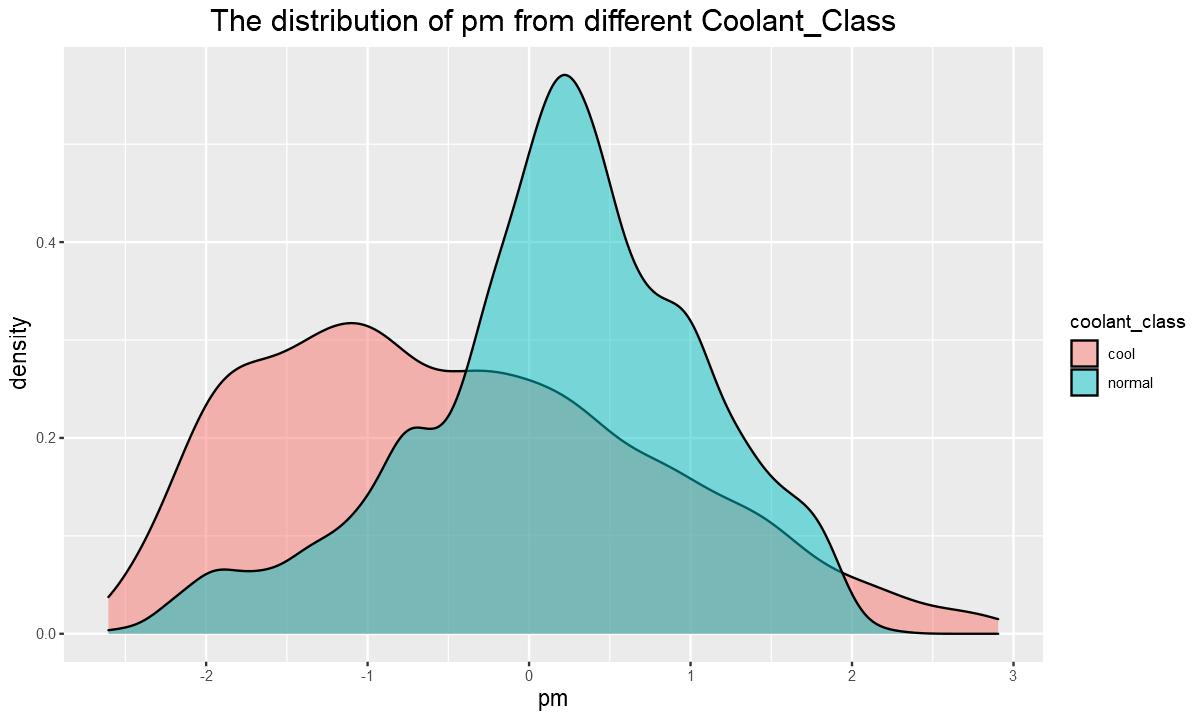

In [63]:
options(repr.plot.width=10, repr.plot.height=6)

par(mfrow = c(1,2))

#Define cool as coolant<-1 and normal as coolant>-1
#Big number of points cluster where coolant <-1
train$coolant_class<-'cool'
train[train['coolant']>=(-1),]$coolant_class='normal'

ggplot(aes(x=pm), data = train) +
geom_density(aes(fill = coolant_class),alpha=0.5) +
ggtitle('The distribution of pm from different Coolant_Class') + 
theme(strip.text.x = element_text(size = 15),
      plot.title = element_text(size=18,hjust=0.5),
      axis.title.y = element_text(size = rel(1.2), angle = 90),
      axis.title.x = element_text(size = rel(1.2)))

We can see that there is a distribution difference of `pm` between the class when coolant < `-1` (class cool) and when coolant > `-1`(class normal). The `pm` of the population with very cool coolant tend to be lower than the pm of the normal coolant.

#### Relationship between Current measures

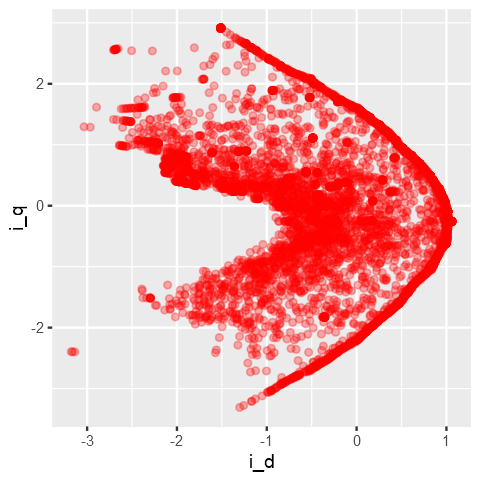

In [65]:
#Investigate relationship between i_q and i_d
options(repr.plot.width=4, repr.plot.height=4)

ggplot(train, aes(x=i_d,y=i_q))+geom_point(alpha=0.3,colour='red')

It makes sense that the correlation between `i_d` and `i_q` are low, because as the scatterplot shows, they do not form a linear relationship. However, there are likely some hidden interaction between the `i_q` and `i_d`, as we can see a clear horizontal parabola-like pattern. `i_d` and `i_q` are measures of current at different dimensions, therefore there should be some underlying interactions between these two variables. The general pattern that we can observe is:

- As `i_d` goes to maximum, `i_q` are likely to be slightly below zero. As `i_d` decreases, the `i_q` is likely to be either at its maximum or the miminum.

And since `torque` and `i_q` has a perfectly positive correlation of 1, it is very likely that the scatterplot of `torque` vs `i_d` will have the same pattern as that of `i_q` vs `i_d`. This means that `i_d` and `torque` also share a non-linear relationship.

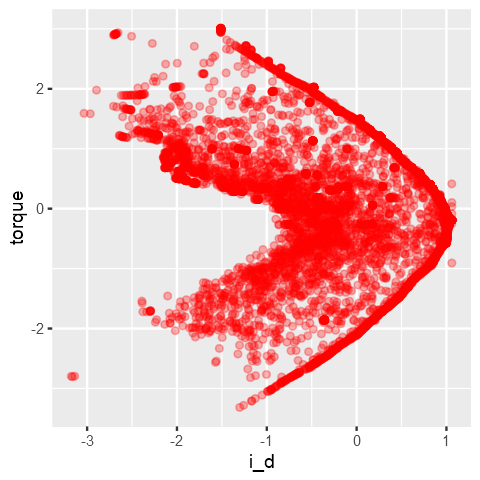

In [69]:
options(repr.plot.width=4, repr.plot.height=4)

ggplot(train, aes(x=i_d,y=torque))+geom_point(alpha=0.3,colour='red')

#### Relationship between Voltage measures

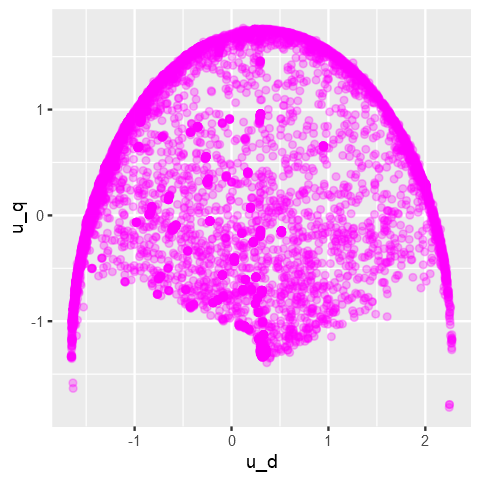

In [67]:
#Investigate relationship between u_q and u_d
options(repr.plot.width=4, repr.plot.height=4)

ggplot(train, aes(x=u_d,y=u_q))+geom_point(alpha=0.3,colour='magenta')

The pattern between `u_d` and `u_q` is very similar to the pattern between `i_d` and `i_q`, except the shape is a vertical parabola-like pattern. The general pattern here is that:
- As `u_d` approaches 0 or the area slightly bigger than 0, `u_q` approaches its maximum. As `u_d` becomes bigger than 2 or smaller than -1.5, `u_q` is likely to approach its minimum.

#### Relationship between `torque` and `motor_speed`

Based on the scatterplot matrix earlier, there seems to be some kind of pattern in `torque` vs `motor_speed` scatterplot. It makes sense because Torque is a force that can exist in the motor, which wouold have an influence on motor speed. 

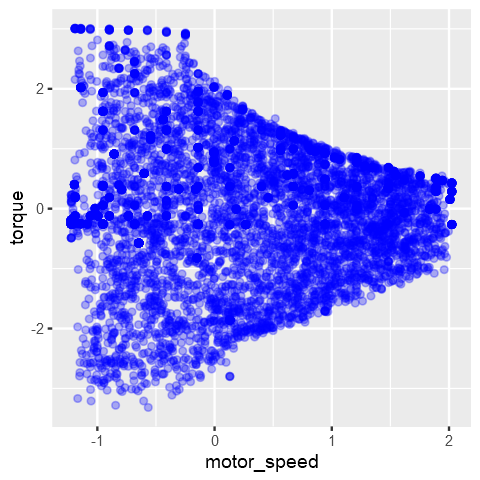

In [78]:
options(repr.plot.width=4, repr.plot.height=4)

#scatterplot between torque and motor speed
ggplot(train, aes(x=motor_speed,y=torque))+geom_point(alpha=0.3,colour='blue')

We can see that the `torque` and `motor_speed` form a horizontal funnel-like shape. When `motor_speed` become large, torque tends to be approaching 0. This can be due to the longer constant operation of the motor. In addition, we can also see a lot of random points disperse around which represent the random walks during operation.

To summarize the outcome of EDA analysis with univariate and multivariate analysis:

- The attributes in the dataframe has already been standardised.
- The target variable `pm` has a normal distribution. Some of the predictor variables have skewness such as `i_d`, `motor_speed`,`u_q`,`coolant`.
- `Torque` and `i_q` has a perfect positive correlation of 1.
- Many of the predictor variables have some sort of correlations and patterns. Many variable pairs have absolute value of correlation more than 0.15, indicating some sort of linear relationships.
- There are also some predictor variable pairs that show some non-linear interactions such as: `u_q` and `u_d`, `i_q` and `i_d`,`motor_speed` and `torque`.
- All predictor variables form some sort of linear relationships with the target variable, albeit weak.
- When spliting the data into `Coolant`<-1 and `coolant`> -1, we see the the target variable form distinctive distribution between these two groups of the data.

## 2. Feature Engineering <a class="anchor" id="2"></a>

## 3. Model Development <a class="anchor" id="3"></a>

Our goal is to use attributes `ambient`, `coolant`, `u_d`, `u_q`, `motor_speed`, `torque`, `i_d` and `i_q` to build models that can predict the target variable `pm`. In the process, we make use of `profile_id` to separate training and testing set.

## 4. Results and Discussion <a class="anchor" id="4"></a>

In [ ]:
_